# LSTM text generation

In [170]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

#### Data

In [171]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus=data.lower().split('\n')

In [172]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
all_words=len(tokenizer.word_index)+1
all_words

263

In [173]:
corpus[0]

'in the town of athy one jeremy lanigan '

In [174]:
tokenizer.texts_to_sequences(corpus)[0]

[4, 2, 66, 8, 67, 68, 69, 70]

#### Preprocessing

In [175]:
input_sequences=[]
tokens=tokenizer.texts_to_sequences(corpus)
for token in tokens:
    for i in range(1,len(token)):
        mini_sequence=token[:i+1]
        input_sequences.append(mini_sequence)

max_sequence=max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence,padding='pre'))
xs,labels=input_sequences[:,:-1],input_sequences[:,-1]
ys=tf.keras.utils.to_categorical(labels,num_classes=all_words)

In [176]:
xs[:max_sequence]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  2, 66],
       [ 0,  0,  0,  0,  0,  0,  4,  2, 66,  8],
       [ 0,  0,  0,  0,  0,  4,  2, 66,  8, 67],
       [ 0,  0,  0,  0,  4,  2, 66,  8, 67, 68],
       [ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 71],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 71, 40],
       [ 0,  0,  0,  0,  0,  0,  0, 71, 40, 20],
       [ 0,  0,  0,  0,  0,  0, 71, 40, 20, 21]])

In [152]:
labels[:max_sequence]

array([ 2, 66,  8, 67, 68, 69, 70, 40, 20, 21, 72])

one-hot encose the labels

#### check the data

In [154]:
txt=corpus[0].split()
txt

['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']

In [155]:
tokens=[tokenizer.word_index[word] for word in txt]
tokens

[4, 2, 66, 8, 67, 68, 69, 70]

In [156]:
xs[6]

array([ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69])

In [126]:
tokenizer.sequences_to_texts([xs[6]])

['in the town of athy one jeremy']

In [127]:
ys[6]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [128]:
np.argmax(ys[6])

70

#### Model

In [177]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(all_words,64,input_length=max_sequence-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(all_words,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 64)            16832     
                                                                 
 bidirectional_10 (Bidirecti  (None, 40)               13600     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [178]:
history=model.fit(xs,ys,epochs=500)

Epoch 1/500
15/15 [==============================] - 3s 6ms/step - loss: 5.5686 - accuracy: 0.0177
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 5.5437 - accuracy: 0.0574
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 5.4844 - accuracy: 0.0684
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 5.3223 - accuracy: 0.0662
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 5.1423 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0732 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0391 - accuracy: 0.0574
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0087 - accuracy: 0.0596
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9830 - accuracy: 0.0552
Epoch 10/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9559 - accuracy: 0.0530
Epoch 11/

Text(0.5, 1.0, 'Accuracy')

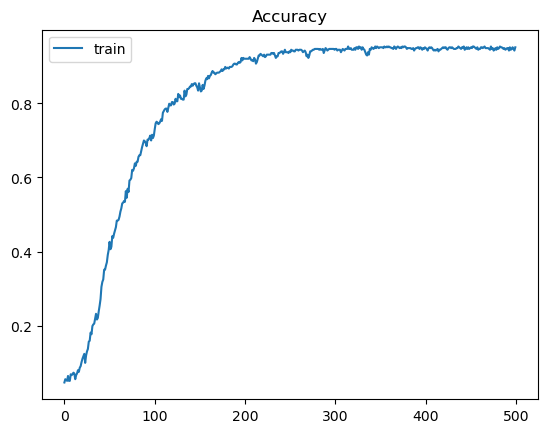

In [84]:
plt.plot(history.history['accuracy'],label='train')
#plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy')

#### Generating text

In [194]:
text='Johen went to kickoff'

In [195]:
next_words=50
for _ in range(next_words):
    tokens=tokenizer.texts_to_sequences([text])[0]
    tokens=pad_sequences([tokens],maxlen=max_sequence-1,padding='pre')
    probabilities=model.predict(tokens)
    pred=np.argmax(probabilities,axis=-1)[0]
    if pred!=0:
        predicted_word=tokenizer.index_word[pred]
        text+=' '+predicted_word

In [196]:
text

'Johen went to kickoff the girls and boys they were hearty hearty hearty mad at all and nothing a water water water water plenty as water water water ten ground ground ground ground fainted long able able able three able in in dublin dublin strangled glisten put new wall wall wall cask accident terrance'

---

## Poetry

#### Data

In [198]:
data = open('data/Laurences_generated_poetry.txt').read()
corpus = data.lower().split("\n")
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

#### Preprocessing

In [199]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
all_words=len(tokenizer.word_index)+1
all_words

2690

In [200]:
input_sequences=[]
tokens=tokenizer.texts_to_sequences(corpus)
for token in tokens:
    for i in range(1,len(token)):
        mini_sequence=token[:i+1]
        input_sequences.append(mini_sequence)

max_sequence=max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence,padding='pre'))
xs,labels=input_sequences[:,:-1],input_sequences[:,-1]
ys=tf.keras.utils.to_categorical(labels,num_classes=all_words)

#### Model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(all_words,100,input_length=max_sequence-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(all_words,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',learning_rate=0.01,metrics=['accuracy'])
model.summary()

In [ ]:
history=model.fit(xs,ys,epochs=100)

#### Prediction

In [ ]:
text='Why o why do you exist'
next_words=50
for _ in range(next_words):
    tokens=tokenizer.texts_to_sequences([text])[0]
    tokens=pad_sequences([tokens],maxlen=max_sequence-1,padding='pre')
    probabilities=model.predict(tokens)
    pred=np.argmax(probabilities,axis=-1)[0]
    if pred!=0:
        predicted_word=tokenizer.index_word[pred]
        text+=' '+predicted_word